In [1]:
import json
import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

url='https://pkgstore.datahub.io/core/oil-prices/brent-year_json/data/753e72173ba5f14ddec831533cc9b418/brent-year_json.json'
response=requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "Date": "1987-06-30",
        "Price": "18.53"
    },
    {
        "Date": "1988-06-30",
        "Price": "14.91"
    },
    {
        "Date": "1989-06-30",
        "Price": "18.23"
    },
    {
        "Date": "1990-06-30",
        "Price": "23.76"
    },
    {
        "Date": "1991-06-30",
        "Price": "20.04"
    },
    {
        "Date": "1992-06-30",
        "Price": "19.32"
    },
    {
        "Date": "1993-06-30",
        "Price": "17.01"
    },
    {
        "Date": "1994-06-30",
        "Price": "15.86"
    },
    {
        "Date": "1995-06-30",
        "Price": "17.02"
    },
    {
        "Date": "1996-06-30",
        "Price": "20.64"
    },
    {
        "Date": "1997-06-30",
        "Price": "19.11"
    },
    {
        "Date": "1998-06-30",
        "Price": "12.76"
    },
    {
        "Date": "1999-06-30",
        "Price": "17.9"
    },
    {
        "Date": "2000-06-30",
        "Price": "28.66"
    },
    {
        "Date": "2001-06-30",
        "Pr

In [3]:
dates=[]
prices=[]

for x in range(0,len(response)):
    dates.append(response[x]["Date"])
    prices.append(response[x]['Price'])
    
#creating DataFrame for Oil Prices
oil_price=pd.DataFrame({"Date": dates,
                      "Price": prices})

oil_price.head()

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91
2,1989-06-30,18.23
3,1990-06-30,23.76
4,1991-06-30,20.04


In [4]:
m=dates.index('2017-06-30')
k=len(oil_price['Date'])
j=k-m
oil_price_cut=oil_price[:-j]
oil_price_cut.head()

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91
2,1989-06-30,18.23
3,1990-06-30,23.76
4,1991-06-30,20.04


In [19]:
n=dates.index('2005-06-30')
oil_price_df=oil_price_cut.drop(oil_price_cut.index[0:n+1]).reset_index()
oil_price_df=oil_price_df[['Date', 'Price']]
oil_price_df = oil_price_df.astype({"Price": float})

oil_price_df.head(20)
oil_price_df.dtypes

Date      object
Price    float64
dtype: object

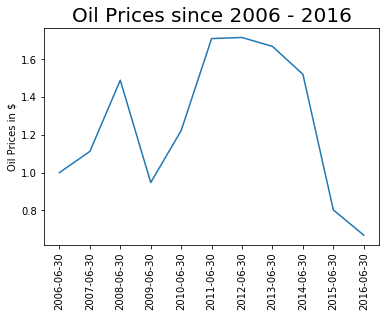

In [22]:
fig, ax = plt.subplots()
y_axis = oil_price_df["Price"]/oil_price_df["Price"][0]
ax.plot(oil_price_df["Date"], y_axis)
plt.xticks( rotation='vertical')
ax.set_ylabel('Oil Prices in $')
ax.set_title('Oil Prices since 2006 - 2016', fontsize=20)

plt.show()